In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('amazon_baby.csv')
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Remove punctuation

In [10]:
def remove_punctuation(text):
    text = str(text)
    import string
    return text.translate( text.maketrans('','',string.punctuation) ) 

In [11]:
data['review_clean'] = data['review'].apply(remove_punctuation)

In [12]:
data.head()

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...


## Sentiments

In [14]:
data = data[data['rating']!=3]
data['sentiment'] = data['rating'].apply(lambda x: +1 if x>3 else -1)
data.head()

,name,review,rating,review_clean,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,1


### index for train and test in json

In [16]:
with open("module-9-assignment-train-idx.json",'r') as f:
    train_idx = json.load(f)
with open("module-9-assignment-test-idx.json",'r') as f:
    test_idx = json.load(f)

In [17]:
train = data.iloc[train_idx,:]
test = data.iloc[test_idx,:]

In [18]:
print(train.shape)
print(test.shape)

(133416, 5)
(33336, 5)


## Word count

In [19]:
data.isna().astype(int).sum()

name            296
review          777
rating            0
review_clean      0
sentiment         0
dtype: int64

In [20]:
## fill nan values for review
data.fillna({'review':''},inplace = True)

In [21]:
data.isna().astype(int).sum()

name            296
review            0
rating            0
review_clean      0
sentiment         0
dtype: int64

In [22]:
train = train.iloc[0:200,:]
test = test.iloc[0:100,:]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer(token_pattern=r'\b\w+\b')
     # Use this token pattern to keep single-letter words

cv_fit = cv.fit_transform(train['review_clean'])
train_matrix = cv_fit.toarray()

In [25]:
cvt = cv.transform(test['review_clean'])
test_matrix = cvt.toarray()

In [28]:
train_matrix.shape

(200, 2126)

In [29]:
test_matrix.shape

(100, 2126)

In [30]:
cols = cv.get_feature_names()

## Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
x_train = pd.DataFrame(train_matrix,columns=cols)
y_train = train['sentiment']

In [33]:
x_test = pd.DataFrame(test_matrix,columns=cols)
y_test = test['sentiment']

In [34]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluation

In [36]:
from sklearn.metrics import accuracy_score
pred = reg.predict(x_test)
true = np.array(y_test)
accuracy = accuracy_score( y_true= true , y_pred = pred )
print("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.87


In [37]:
reg.score(x_test,y_test)

0.87

## Majority class prediction

In [50]:
maj = (y_test==1).astype(int).sum()
baseline = (maj-5)/len(y_test)
print("Baseline accuracy (majority class classifier): %s" % baseline)

Baseline accuracy (majority class classifier): 0.82


In [52]:
reg.classes_

array([-1,  1], dtype=int64)

## Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_true = true,
                        y_pred = pred,
                        labels = reg.classes_)

print(' target_label | predicted_label | count ')
print('--------------+-----------------+-------')

for i, target_label in enumerate(reg.classes_):
    for j, predicted_label in enumerate(reg.classes_):
        print('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |     2
     -1       |        1        |    11
      1       |       -1        |     2
      1       |        1        |    85


## Compute cost of mistakes

In [57]:
false_pos = 11
false_neg = 2
cost = (100 * false_pos) + (1 * false_neg)
cost

1102

## Precision and Recall

In [58]:
from sklearn.metrics import precision_score

precision = precision_score(y_true = true, 
                            y_pred = pred )

print("Precision on test data: %s" % precision)

Precision on test data: 0.8854166666666666


In [59]:
from sklearn.metrics import recall_score

recall = recall_score(y_true = true,
                      y_pred = pred )

print("Recall on test data: %s" % recall)

Recall on test data: 0.9770114942528736


## Varying threshold from 0.5

In [60]:
def apply_threshold( prob , threshold ):
    pred = []
    for i in range(len(prob)):
        if prob[i]<=threshold:
            pred.append(-1)
        else:
            pred.append(+1)
    return pred

In [63]:
probabilities = reg.predict_proba(x_test)[:,1]
probabilities.shape

(100,)

In [64]:
pred_ = apply_threshold(probabilities,0.5)
pred_new = apply_threshold(probabilities,0.9)

In [68]:
pred_ = np.array(pred_)
pred_new = np.array(pred_new)
pos1 = (pred_== 1).astype(int).sum()
pos2 = (pred_new == 1).astype(int).sum()
print(pos1)
print(pos2)

96
86


In [69]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_true = true,
                        y_pred = pred_,
                        labels = reg.classes_)

print(' target_label | predicted_label | count ')
print('--------------+-----------------+-------')

for i, target_label in enumerate(reg.classes_):
    for j, predicted_label in enumerate(reg.classes_):
        print('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |     2
     -1       |        1        |    11
      1       |       -1        |     2
      1       |        1        |    85


In [70]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_true = true,
                        y_pred = pred_new,
                        labels = reg.classes_)

print(' target_label | predicted_label | count ')
print('--------------+-----------------+-------')

for i, target_label in enumerate(reg.classes_):
    for j, predicted_label in enumerate(reg.classes_):
        print('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |     4
     -1       |        1        |     9
      1       |       -1        |    10
      1       |        1        |    77


In [72]:
precision1 = precision_score(y_true = true, 
                            y_pred = pred_ )

print("Precision on test data: %s" % precision1)

precision2 = precision_score(y_true = true, 
                            y_pred = pred_new )

print("Precision on test data: %s" % precision2)

Precision on test data: 0.8854166666666666
Precision on test data: 0.8953488372093024


In [73]:
recall1 = recall_score(y_true = true,
                      y_pred = pred_ )

print("Recall on test data: %s" % recall1)

recall2 = recall_score(y_true = true,
                      y_pred = pred_new )

print("Recall on test data: %s" % recall2)

Recall on test data: 0.9770114942528736
Recall on test data: 0.8850574712643678


## Precision-Recall curve

In [74]:
threshold_values = np.linspace(0.5, 1, num=100)
print(threshold_values)

[0.5        0.50505051 0.51010101 0.51515152 0.52020202 0.52525253
 0.53030303 0.53535354 0.54040404 0.54545455 0.55050505 0.55555556
 0.56060606 0.56565657 0.57070707 0.57575758 0.58080808 0.58585859
 0.59090909 0.5959596  0.6010101  0.60606061 0.61111111 0.61616162
 0.62121212 0.62626263 0.63131313 0.63636364 0.64141414 0.64646465
 0.65151515 0.65656566 0.66161616 0.66666667 0.67171717 0.67676768
 0.68181818 0.68686869 0.69191919 0.6969697  0.7020202  0.70707071
 0.71212121 0.71717172 0.72222222 0.72727273 0.73232323 0.73737374
 0.74242424 0.74747475 0.75252525 0.75757576 0.76262626 0.76767677
 0.77272727 0.77777778 0.78282828 0.78787879 0.79292929 0.7979798
 0.8030303  0.80808081 0.81313131 0.81818182 0.82323232 0.82828283
 0.83333333 0.83838384 0.84343434 0.84848485 0.85353535 0.85858586
 0.86363636 0.86868687 0.87373737 0.87878788 0.88383838 0.88888889
 0.89393939 0.8989899  0.9040404  0.90909091 0.91414141 0.91919192
 0.92424242 0.92929293 0.93434343 0.93939394 0.94444444 0.94949

In [93]:
precision_all = []
recall_all = []

prob = reg.predict_proba(x_test)[:,1]

for thresh in threshold_values:
    
    pred_ = apply_threshold(prob, thresh)
    
    precision = precision_score(y_true = true, y_pred = pred_ )

    recall = recall_score(y_true = true, y_pred = pred_ )
    
    precision_all.append(precision)
    recall_all.append(recall)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
print(len(precision_all))
print(len(recall_all))

100
100


In [86]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})

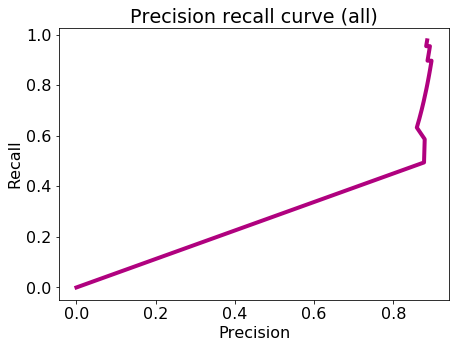

In [87]:
## Wrong curve plotted
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

In [102]:
## min threshold that gives precision >= 0.965
threshold_values[np.array(precision_all) >= 0.965].min()

In [103]:
threshold = 0.98
pred = apply_threshold(probabilities,threshold)
confusion_matrix(true,pred,reg.classes_)

array([[ 4,  9],
       [29, 58]], dtype=int64)